# Running logistic regression and linear discriminant analysis on starbucks data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Adding and Editing Data

In [2]:
offers = pd.read_csv('data/offers_transformed.csv')
portfolio = pd.read_csv('data/portfolio_transformed.csv')
profile = pd.read_csv('data/profile_transformed.csv')

In [3]:
offers = offers.drop(columns=['Unnamed: 0'])
offers.head()

,person,received,received time,offer_id,viewed,viewed time,completed,completed time,reward,transaction,transaction time,amount
0,78afa995795e4d85b5d9ceeca43f5fef,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1,132.0,5.0,1,132.0,19.89
1,a03223e636434f42ac4c3df47e8bac43,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6.0,0,NaN,NaN,0,NaN,NaN
2,a03223e636434f42ac4c3df47e8bac43,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,0,NaN,NaN,0,NaN,NaN
3,e2127556f4f64592b11af22de27a7932,1,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,0,NaN,NaN,0,NaN,NaN
4,8ec6ce2a7e7949b1bf142def7d0e0586,1,0,fafdcd668e3743c1bb461111dcafc2a4,1,12.0,0,NaN,NaN,0,NaN,NaN


In [4]:
portfolio = portfolio.drop(columns=['Unnamed: 0'])
portfolio.head()

,reward,difficulty,duration,offer_type,id,email,social,mobile,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,0,1,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [5]:
profile = profile.drop(columns=['Unnamed: 0'])
profile.head()

,gender,age,id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [6]:
full = offers.merge(portfolio, how = 'left', left_on = 'offer_id', right_on = 'id')

In [7]:
full = full.merge(profile, how = 'inner', left_on = 'person', right_on = 'id')

In [8]:
full.head()

,person,received,received time,offer_id,viewed,viewed time,completed,completed time,reward_x,transaction,...,id_x,email,social,mobile,web,gender,age,id_y,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1,132.0,5.0,1,...,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
1,78afa995795e4d85b5d9ceeca43f5fef,1,168,5a8bc65990b245e5a138643cd4eb9837,1,216.0,0,NaN,NaN,0,...,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
2,78afa995795e4d85b5d9ceeca43f5fef,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,408.0,1,510.0,10.0,1,...,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
3,78afa995795e4d85b5d9ceeca43f5fef,1,504,f19421c1d4aa40978ebb69ca19b0e20d,1,582.0,1,510.0,5.0,1,...,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,e2127556f4f64592b11af22de27a7932,1,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,0,NaN,NaN,0,...,2906b810c7d4411798c6938adc9daaa5,1,0,1,1,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0


In [9]:
full_columns_dropped = full.drop(columns = ['person', 'offer_id',  'reward_x', 'id_x', 'id_y'
                                            , 'received time', 'viewed', 'viewed time', 'completed time', 
                                            'transaction', 'amount', 'transaction time', 'received'])

In [10]:
full_columns_dropped.head()

,completed,reward_y,difficulty,duration,offer_type,email,social,mobile,web,gender,age,became_member_on,income
0,1,5,5,7,bogo,1,0,1,1,F,75,20170509,100000.0
1,0,0,0,3,informational,1,1,1,0,F,75,20170509,100000.0
2,1,10,10,7,bogo,1,1,1,0,F,75,20170509,100000.0
3,1,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0
4,0,2,10,7,discount,1,0,1,1,M,68,20180426,70000.0


In [11]:
full_columns_dropped.to_csv('data/no_dummies.csv', index = False)

In [12]:
full_data = pd.get_dummies(full_columns_dropped)

In [13]:
full_data.head()

,completed,reward_y,difficulty,duration,email,social,mobile,web,age,became_member_on,income,offer_type_bogo,offer_type_discount,offer_type_informational,gender_F,gender_M,gender_O
0,1,5,5,7,1,0,1,1,75,20170509,100000.0,True,False,False,True,False,False
1,0,0,0,3,1,1,1,0,75,20170509,100000.0,False,False,True,True,False,False
2,1,10,10,7,1,1,1,0,75,20170509,100000.0,True,False,False,True,False,False
3,1,5,5,5,1,1,1,1,75,20170509,100000.0,True,False,False,True,False,False
4,0,2,10,7,1,0,1,1,68,20180426,70000.0,False,True,False,False,True,False


In [14]:
full_data.describe()

,completed,reward_y,difficulty,duration,email,social,mobile,web,age,became_member_on,income
count,102693.000000,102693.000000,102693.000000,102693.000000,102693.0,102693.000000,102693.000000,102693.000000,102693.000000,1.026930e+05,102693.000000
mean,0.632877,4.396892,7.844751,6.616118,1.0,0.655906,0.917492,0.807377,54.780258,2.016638e+07,66339.575239
std,0.482023,3.377710,5.068050,2.140023,0.0,0.475074,0.275139,0.394361,17.216516,1.171675e+04,21446.508252
min,0.000000,0.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,18.000000,2.013073e+07,30000.000000
25%,0.000000,2.000000,5.000000,5.000000,1.0,0.000000,1.000000,1.000000,43.000000,2.016043e+07,51000.000000
50%,1.000000,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,56.000000,2.017062e+07,65000.000000
75%,1.000000,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,67.000000,2.017121e+07,81000.000000
max,1.000000,10.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,101.000000,2.018073e+07,120000.000000


Need to remove email - all 1's

In [15]:
# full_data = full_data.drop('email', 1)
full_data.drop(full_data.loc[full_data['email']==1].index) #, inplace=True)


,completed,reward_y,difficulty,duration,email,social,mobile,web,age,became_member_on,income,offer_type_bogo,offer_type_discount,offer_type_informational,gender_F,gender_M,gender_O


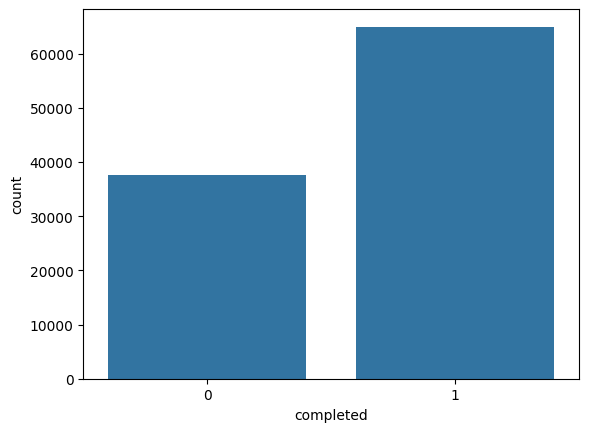

In [16]:
sns.countplot(x = 'completed', data = full_data)
plt.show()

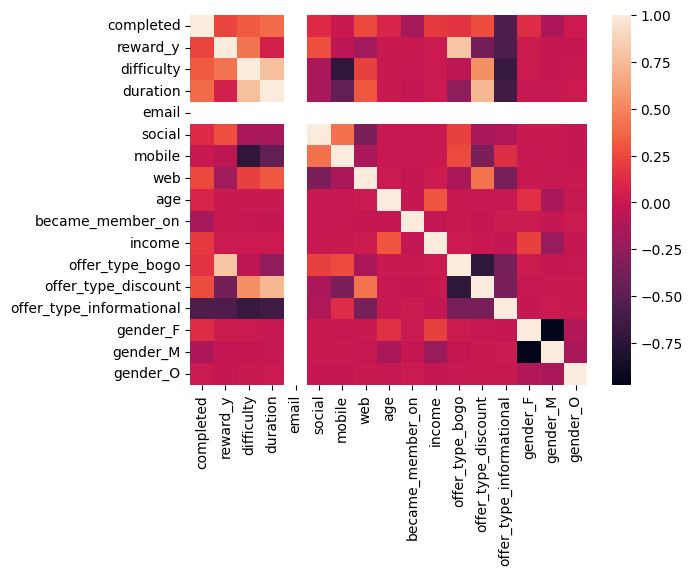

In [17]:
corrMatrix = full_data.corr()
sns.heatmap(corrMatrix, annot = False)
plt.show()

In [18]:
full_data.to_csv('data/full_data.csv', index = False)

# Logistic Regression - Full Model (Baseline)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
model = LogisticRegression(solver = 'liblinear')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(full_data, full_data['completed'],
                                                    test_size = 0.2, random_state = 25)

In [22]:
X_train.head()

,completed,reward_y,difficulty,duration,email,social,mobile,web,age,became_member_on,income,offer_type_bogo,offer_type_discount,offer_type_informational,gender_F,gender_M,gender_O
75981,1,3,7,7,1,1,1,1,42,20150201,72000.0,False,True,False,False,True,False
42706,1,10,10,7,1,1,1,0,64,20171119,55000.0,True,False,False,False,True,False
69061,1,10,10,7,1,1,1,0,46,20171127,40000.0,True,False,False,True,False,False
54223,0,0,0,4,1,0,1,1,53,20171021,94000.0,False,False,True,True,False,False
65945,0,5,5,7,1,0,1,1,46,20171013,67000.0,True,False,False,False,True,False


In [23]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.11      0.19      7578
           1       0.64      0.94      0.76     12961

    accuracy                           0.63     20539
   macro avg       0.58      0.53      0.47     20539
weighted avg       0.59      0.63      0.55     20539



In [26]:
import sklearn.metrics as metrics
metrics.confusion_matrix(y_test, predictions)

array([[  862,  6716],
       [  825, 12136]])

Calculating Baseline Accuracy

In [27]:
(sum(full_data['completed']))/(full_data.shape[0])#

0.6328766322923666

# Logistic Regression

In [28]:
log_reg_data = full_data.drop(['duration', 'became_member_on', 'gender_F', 'gender_M', 'gender_O'], axis = 1)

In [29]:
log_reg_data.head()

,completed,reward_y,difficulty,email,social,mobile,web,age,income,offer_type_bogo,offer_type_discount,offer_type_informational
0,1,5,5,1,0,1,1,75,100000.0,True,False,False
1,0,0,0,1,1,1,0,75,100000.0,False,False,True
2,1,10,10,1,1,1,0,75,100000.0,True,False,False
3,1,5,5,1,1,1,1,75,100000.0,True,False,False
4,0,2,10,1,0,1,1,68,70000.0,False,True,False


In [30]:
log_reg_data.to_csv('data/log_reg_data.csv', index = False)

Running the Logistic Regression

In [31]:
model2 = LogisticRegression(solver = 'liblinear')

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(log_reg_data, log_reg_data['completed'],
                                                    test_size = 0.2, random_state = 25)

In [33]:
model2.fit(X_train2, y_train2)

LogisticRegression(solver='liblinear')

In [34]:
y_pred = model2.predict(X_test2)

In [35]:
from scipy import stats
print(stats.describe(y_pred))

DescribeResult(nobs=20539, minmax=(0, 1), mean=0.828180534592726, variance=0.14230446521461346, skewness=-1.7399794645229247, kurtosis=1.0275285369614862)


In [36]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63      7578
           1       0.76      1.00      0.86     12961

    accuracy                           0.80     20539
   macro avg       0.88      0.73      0.75     20539
weighted avg       0.85      0.80      0.78     20539



In [37]:
metrics.confusion_matrix(y_test2, y_pred)

array([[ 3513,  4065],
       [   16, 12945]])

# Interpretation

<Axes: ylabel='count'>

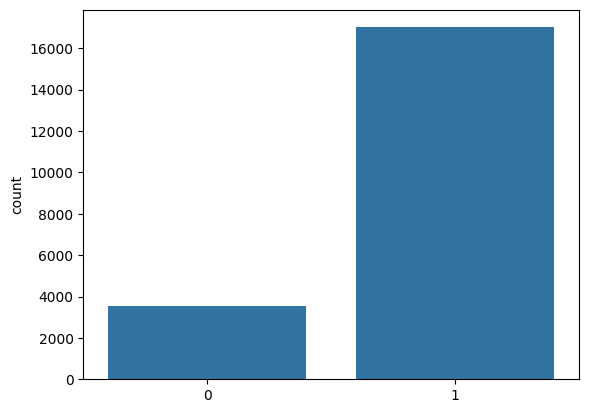

In [38]:
sns.countplot(x = y_pred)

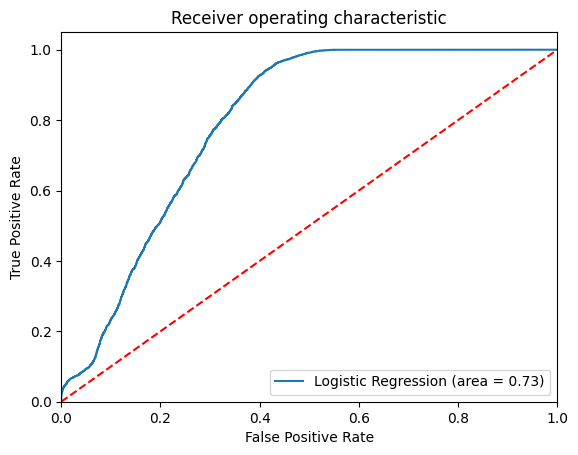

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test2, y_pred)
fpr, tpr, thresholds = roc_curve(y_test2, model2.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
cols = X_test2.columns
print(cols)

Index(['completed', 'reward_y', 'difficulty', 'email', 'social', 'mobile',
       'web', 'age', 'income', 'offer_type_bogo', 'offer_type_discount',
       'offer_type_informational'],
      dtype='object')


In [41]:
coefficients = model2.coef_
print(coefficients)

[[ 4.18379682e-01  5.51763401e-02  1.09578610e-01 -5.00038906e-02
   1.97261667e-02 -9.77297645e-03  4.40703599e-02 -1.52109333e-02
   3.77070598e-06  3.14561766e-02  6.94179567e-02 -1.50878024e-01]]


Logistic Regression for Age Group

In [42]:
college_age = log_reg_data[log_reg_data['age'] <= 35]
college_age.describe()

,completed,reward_y,difficulty,email,social,mobile,web,age,income
count,15464.000000,15464.000000,15464.00000,15464.0,15464.000000,15464.000000,15464.000000,15464.000000,15464.000000
mean,0.529811,4.429255,7.81680,1.0,0.674082,0.922206,0.800375,26.741593,51187.661666
std,0.499127,3.432977,5.00789,0.0,0.468732,0.267855,0.399731,5.065180,12934.293891
min,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,18.000000,30000.000000
25%,0.000000,2.000000,5.00000,1.0,0.000000,1.000000,1.000000,22.000000,40000.000000
50%,1.000000,3.000000,10.00000,1.0,1.000000,1.000000,1.000000,27.000000,51000.000000
75%,1.000000,5.000000,10.00000,1.0,1.000000,1.000000,1.000000,31.000000,62000.000000
max,1.000000,10.000000,20.00000,1.0,1.000000,1.000000,1.000000,35.000000,75000.000000


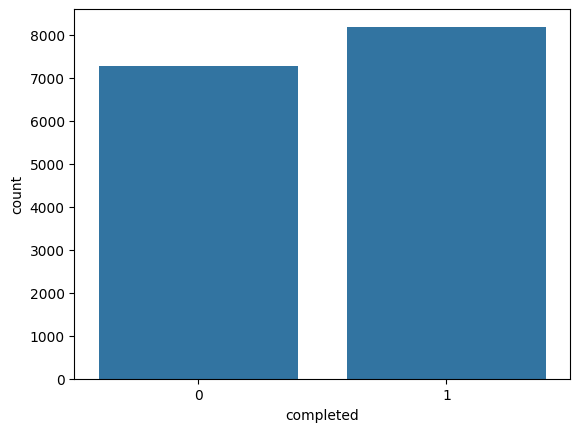

In [43]:
sns.countplot(x = 'completed', data = college_age)
plt.show()

In [44]:
model3 = LogisticRegression()

In [45]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(college_age, college_age['completed'],
                                                    test_size = 0.2, random_state = 25)

In [46]:
model3.fit(X_train3, y_train3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred3 = model3.predict(X_test3)

In [48]:
print(stats.describe(y_pred3))

DescribeResult(nobs=3093, minmax=(0, 1), mean=0.5150339476236664, variance=0.2498547611369662, skewness=-0.060162992673090436, kurtosis=-1.9963804143126176)


In [49]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1489
           1       0.97      0.96      0.97      1604

    accuracy                           0.97      3093
   macro avg       0.97      0.97      0.97      3093
weighted avg       0.97      0.97      0.97      3093



In [50]:
metrics.confusion_matrix(y_test2, y_pred)

array([[ 3513,  4065],
       [   16, 12945]])

Baseline Accuracy

In [51]:
(sum(college_age['completed']))/(college_age.shape[0])

0.5298111743404035

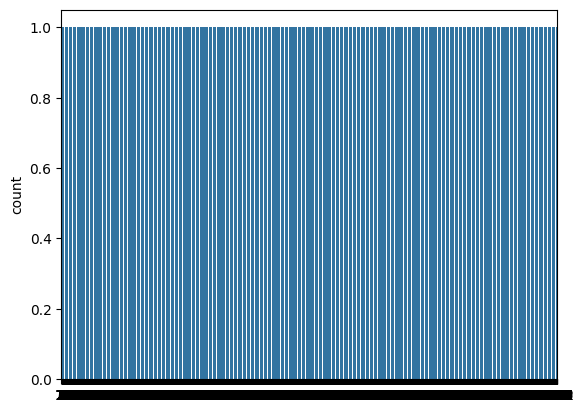

In [52]:
sns.countplot(y_pred3)
plt.show()

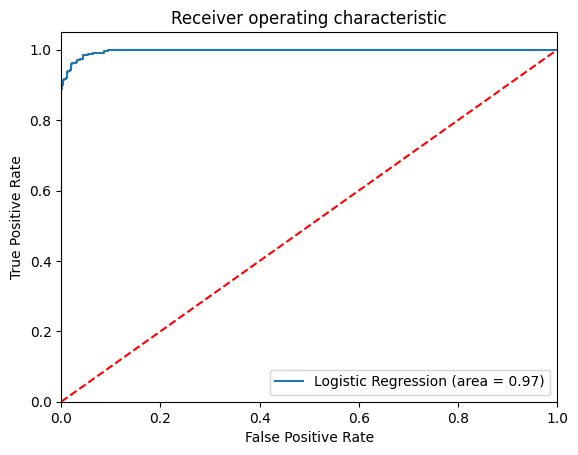

In [53]:
logit_roc_auc3 = roc_auc_score(y_test3, y_pred3)
fpr, tpr, thresholds = roc_curve(y_test3, model3.predict_proba(X_test3)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
model3.coef_

array([[ 1.40543662e+01, -1.08336608e+00, -3.60831421e-01,
        -4.49076279e-01,  1.63156169e+00,  9.37984150e-01,
         2.07263754e+00,  1.05435715e-01, -7.75592586e-05,
         6.67150442e-01,  2.44996495e+00, -3.56619167e+00]])